# import

In [9]:

# Step 1: Imports
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
# Custom preprocessing functions
import sys, os
sys.path.append(os.path.abspath('..'))
from src.data_processing import load_data, clean_data, feature_engineer_fraud, transform_data

# load credit card data

In [10]:
creditcard_df = load_data(r"C:\Users\user\Desktop\Project\Adey_Innovations\data\raw\creditcard.csv")


# prepare feature target

In [16]:
X= creditcard_df.drop(columns=['Class'])
y= creditcard_df['Class'].astype(int)
scaler= StandardScaler()
X_scaled=pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns
)

X_train,X_test ,y_train, y_test =train_test_split(

    X_scaled,y ,test_size=0.2 ,random_state= 42, stratify =y
)

# train XGBoost model

In [17]:
xgb_model=XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate= 0.1,
    random_state =42,
    eval_metric= 'logloss'
)
xgb_model.fit(X_train , y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

# SHAP explainer

In [18]:
explainer =shap.Explainer(xgb_model , X_train)
shap_values= explainer(X_test)

100%|===================| 56895/56962 [06:07<00:00]        

# SHAP global

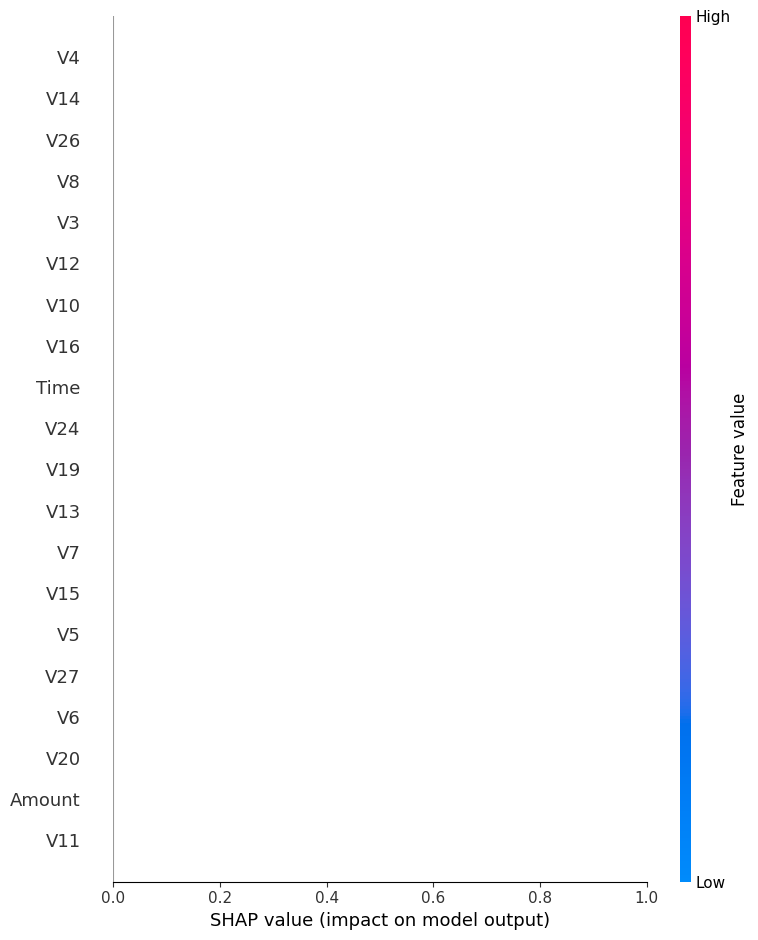

In [19]:
shap.summary_plot(shap_values, X_test ,plot_type=" bar")

# SHAP beeswarm plot

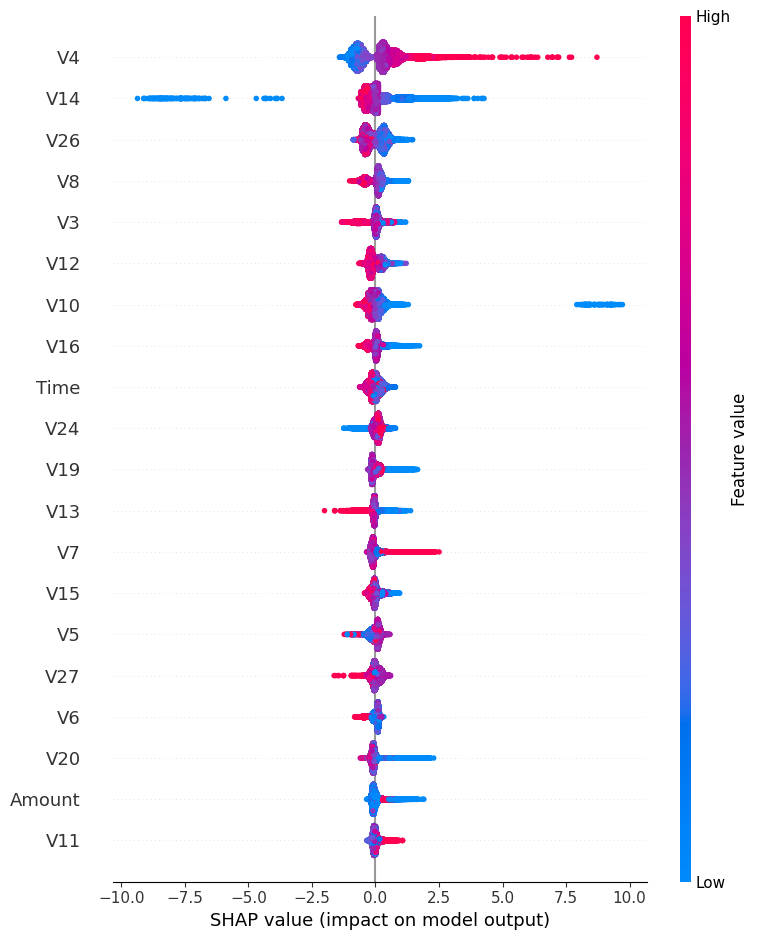

In [20]:
shap.summary_plot(shap_values ,X_test)

# shap plot in single transaction

In [21]:
shap.initjs()

idx=0
shap.force_plot(
    explainer.expected_value,
    shap_values[idx].values,
    X_test.iloc[idx]
)

# SHAP dependence plot

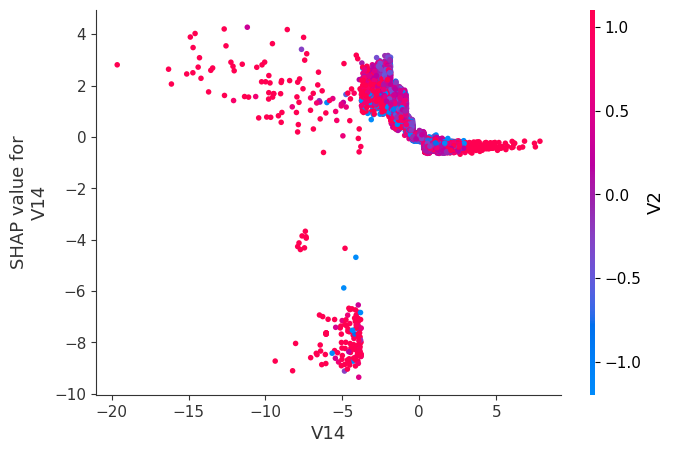

In [22]:
shap.dependence_plot("V14",shap_values.values ,X_test)

# save shap values

In [23]:
shap_values_df= pd.DataFrame(
    shap_values.values,
    columns= X_test.columns
)
shap_values_df.to_csv(r"C:\Users\user\Desktop\Project\Adey_Innovations\data\processed\finalcredit.csv", index= False)